# Optimization 4 - Constraint Optimization

In [1]:
import numpy as np                 # for working with arrays and mathematical functions
import matplotlib.pyplot as plt    # for creating various types of plots
from mpl_toolkits.mplot3d import axes3d  # for creating 3D plots

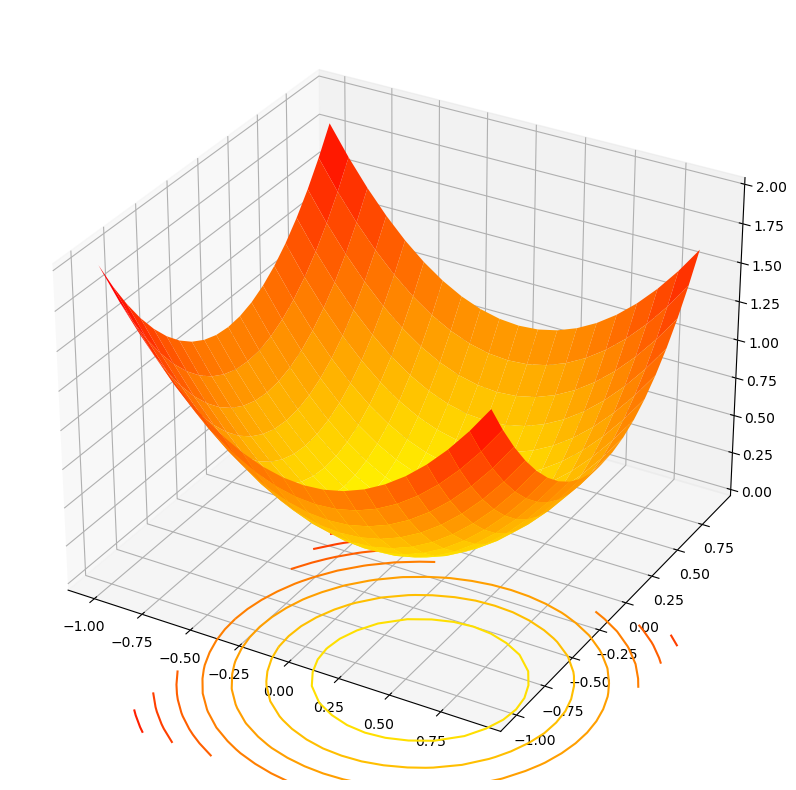

In [2]:
# Create a new figure with a size of 12x10 inches
fig = plt.figure(figsize=(12,10))

# Add a subplot with a 3D projection to the figure
ax = fig.add_subplot(projection='3d')

# Define a grid of points in the x-y plane
W1, W2 = np.mgrid[-1:1:0.1, -1:1:0.1]

# Define a function L that depends on W1 and W2
L = W1**2 + W2**2

# Create a surface plot of L in the x-y plane
# cmap="autumn_r" sets the color map to autumn with reversed order
# lw=0.5 sets the linewidth of the surface to 0.5
# rstride=1 and cstride=1 set the stride of the row and column for the grid
ax.plot_surface(W1, W2, L, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)

# Create a contour plot of L in the x-y plane, offset by -1
# cmap="autumn_r" sets the color map to autumn with reversed order
ax.contour(W1, W2, L, cmap="autumn_r", offset=-1)

# Display the figure
plt.show()


In [3]:
X, Y = np.mgrid[-1:1:0.1, -1:1:0.1]
X, Y

(array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
         -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
        [-0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9,
         -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9],
        [-0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8,
         -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8],
        [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7,
         -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7],
        [-0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
         -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
         -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
         -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4],
        [-0.3, -0.3, -0.3, 

In [4]:
X.shape

(20, 20)

In [5]:
Y.shape

(20, 20)

## Gradient Descent for 2 Input Variables

In [7]:
# Define a function that takes two input variables and returns the output of the function
def func(w1, w2):
    return (w1 - 5) ** 2 + (w2 - 3) ** 2

In [8]:
# Define a function that takes a function and two input variables, and returns the partial derivatives of the function with respect to each input variable
def partial_derivative(func, w1, w2):
    # Define a small value used to compute the partial derivatives
    delta_k = 0.000001

    # Compute the partial derivative of the function with respect to the first input variable
    d_w1 = (func(w1 + delta_k, w2) - func(w1, w2)) / (delta_k)

    # Compute the partial derivative of the function with respect to the second input variable
    d_w2 = (func(w1, w2 + delta_k) - func(w1, w2)) / (delta_k)

    # Return the computed partial derivatives
    return d_w1, d_w2


In [42]:
# Define a function that performs gradient descent optimization on a given function, with a given learning rate
def gradient_descent(func, lr=0.1):
    # Initialize a list to store the values of the input variables during optimization
    w_values = []
    
    # Initialize the input variables with random values
    w = np.random.randn(2)
    w_values.append(w)
    
    # Loop until convergence or until a maximum number of iterations is reached
    for _ in range(100):
        # Compute the partial derivatives of the function with respect to the input variables
        d_w1, d_w2 = partial_derivative(func, w[0], w[1])
        
        # Update the input variables using the gradient descent rule
        w[0] = w[0] - lr*d_w1
        w[1] = w[1] - lr*d_w2
        
        # Add the updated input variables to the list of values
        w_values.append(w)
    
    # Return the final list of input variable values
    return w_values


In [43]:
# Here gradient descent with multiple variable is working.
# giving minima at (5,3)

# Use the gradient descent function to find the minimum of the given function
a = gradient_descent(func, lr=0.05)

# Print the final input variable values, which should be close to the optimal values (5, 3)
a[-1]

array([4.9998345, 2.9999297])

## Constraint Optimization

In [1]:
from scipy.optimize import minimize # import the minimize function from scipy.optimize module

In [2]:
def objective(w): # define the objective function that takes a list of two values as input
    return (w[0] ** 2) + (w[1] ** 2) # return the value of w[0]^2 + w[1]^2

In [3]:
def constraint(w): # define the constraint function that takes a list of two values as input
    return w[0] + 2*w[1] - 1 # return the value of w[0] + 2*w[1] - 1

In [5]:
w_start = [0,0] # define the starting values for the optimization
cons = [{"type": "eq", "fun": constraint}] # define the constraint dictionary with a single equality constraint
optimal_solution = minimize(objective, w_start, constraints=cons) # minimize the objective function with the constraint
print(solution.x) # print the optimal values of the input that minimize the objective function subject to the constraint.

[0.2 0.4]


<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/